<a href="https://colab.research.google.com/github/juniajeff/AI_training/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook kaggle
import fastbook
fastbook.setup_book()

In [ ]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
! cp ./gdrive/MyDrive/'Colab Notebooks'/data/TrainAndValid.csv ./sample_data/

In [ ]:
! pwd

/content


In [ ]:
! ls ./sample_data/

anscombe.json		      mnist_test.csv	     TrainAndValid.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
df_nn = pd.read_csv('./sample_data/TrainAndValid.csv', low_memory=False)
df_nn.shape

(412698, 53)

In [ ]:
df_nn.columns
# SalesID:: The unique identifier of the sale.
# SalepPice:: What the machine sold for at auction (only provided in train.csv).
# MachineID:: The unique identifier of a machine. A machine can be sold multiple times.
# saledate:: The date of the sale.

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df_nn['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [ ]:
df_nn.head()

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN


In [ ]:
df_nn.tail()

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,...,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,...,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,...,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,...,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,...,NaN,NaN,NaN,NaN


In [ ]:
df_nn['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [ ]:
df_nn['Drive_System'].unique()

array([nan, 'Four Wheel Drive', 'Two Wheel Drive', 'No', 'All Wheel Drive'], dtype=object)

In [ ]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
dep_var = 'SalePrice'

(array([151074., 119019.,  58000.,  32444.,  22876.,  13474.,   9330.,   3884.,   2036.,    561.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100., 100825., 114550., 128275., 142000.]),
 <a list of 10 Patch objects>)

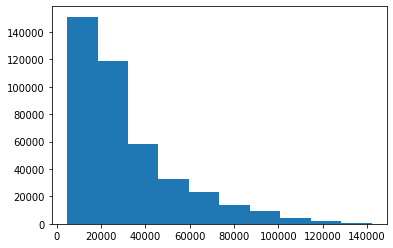

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_nn[dep_var])

In [ ]:
df_nn[dep_var] = np.log(df_nn[dep_var]) # applying a log function to the dependent variable

(array([ 6008., 28652., 53542., 62872., 70605., 70694., 51722., 36833., 25443.,  6327.]),
 array([ 8.4658999 ,  8.80566814,  9.14543638,  9.48520463,  9.82497287, 10.16474112, 10.50450936, 10.8442776 , 11.18404585, 11.52381409, 11.86358234]),
 <a list of 10 Patch objects>)

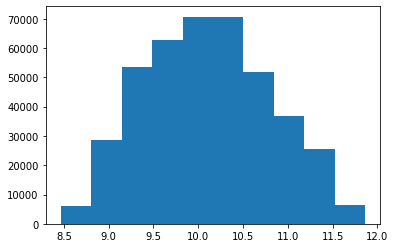

In [ ]:
plt.hist(df_nn[dep_var])

In [ ]:
df_nn = add_datepart(df_nn, 'saledate') # adding extra columns for handling dates

In [ ]:
help(add_datepart)

Help on function add_datepart in module fastai.tabular.core:

add_datepart(df, field_name, prefix=None, drop=True, time=False)
    Helper function that adds columns relevant to a date in the column `field_name` of `df`.



In [ ]:
df_nn.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [ ]:
df_nn.head()

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,...,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,...,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,...,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,...,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,...,False,False,False,1.248307e+09


In [ ]:
df_nn.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [ ]:
finalColumns = list(['SalesID', 'YearMade', 'ProductSize', 'ModelID', 'Tire_Size'])

In [ ]:
df_nn_final = df_nn[finalColumns + [dep_var]]

In [ ]:
df_nn_final.head()

,SalesID,YearMade,ProductSize,ModelID,Tire_Size,SalePrice
0,1139246,2004,NaN,3157,None or Unspecified,11.097410
1,1139248,1996,Medium,77,23.5,10.950807
2,1139249,2001,NaN,7009,NaN,9.210340
3,1139251,2001,Small,332,NaN,10.558414
4,1139253,2007,NaN,17311,NaN,9.305651


In [ ]:
df_nn_final[:20]

,SalesID,YearMade,ProductSize,ModelID,Tire_Size,SalePrice
0,1139246,2004,NaN,3157,None or Unspecified,11.097410
1,1139248,1996,Medium,77,23.5,10.950807
2,1139249,2001,NaN,7009,NaN,9.210340
3,1139251,2001,Small,332,NaN,10.558414
4,1139253,2007,NaN,17311,NaN,9.305651
5,1139255,2004,NaN,4605,NaN,10.184900
6,1139256,1993,Large / Medium,1937,NaN,9.952278
7,1139261,2001,NaN,3539,NaN,10.203592
8,1139272,2008,Mini,36003,NaN,9.975808
9,1139275,1000,Large,3883,None or Unspecified,11.082143


In [ ]:
df_nn_final.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
YearMade,2004,1996,2001,2001,2007
ProductSize,NaN,Medium,NaN,Small,NaN
ModelID,3157,77,7009,332,17311
Tire_Size,None or Unspecified,23.5,NaN,NaN,NaN
SalePrice,11.09741,10.950807,9.21034,10.558414,9.305651


In [ ]:
df_nn_final.columns

Index(['SalesID', 'YearMade', 'ProductSize', 'ModelID', 'Tire_Size',
       'SalePrice'],
      dtype='object')

In [ ]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [ ]:
cont_nn

['SalesID']

In [ ]:
cat_nn

['YearMade', 'ProductSize', 'ModelID', 'Tire_Size']

In [ ]:
df_nn_final[cat_nn].nunique()

YearMade         73
ProductSize       6
ModelID        5281
Tire_Size        17
dtype: int64

In [ ]:
df_nn_final['YearMade'].unique()

array([2004, 1996, 2001, 2007, 1993, 2008, 1000, 1998, 1999, 2003, 1991, 2000, 2005, 1995, 2006, 2002, 1984, 1988, 1980, 1992, 1987, 1997, 1971, 1978, 1989, 1985, 1979, 1976, 1994, 1982, 1990, 1974,
       1968, 1966, 1983, 1986, 1981, 1970, 1977, 1975, 1973, 1965, 1967, 2009, 2010, 1969, 1972, 1964, 1957, 1958, 1963, 1919, 1920, 1950, 1948, 1952, 1942, 1956, 1954, 1953, 1955, 1959, 1960, 1961,
       1962, 1951, 1937, 1949, 1947, 2012, 2013, 2011, 2014])

In [ ]:
len(df_nn_final['YearMade'].unique())

73

In [ ]:
df_nn_final['ProductSize'].unique()

[NaN, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [ ]:
df_nn_final['Tire_Size'].unique()

array(['None or Unspecified', '23.5', nan, '13"', '26.5', '29.5', '14"', '20.5', '17.5"', '15.5"', '20.5"', '17.5', '7.0"', '15.5', '23.5"', '10"', '23.1"', '10 inch'], dtype=object)

In [ ]:
((df_nn.saleYear == 2011) & (df_nn.saleMonth<10)) | (df_nn.saleYear<2011)

0          True
1          True
2          True
3          True
4          True
          ...  
412693    False
412694    False
412695    False
412696    False
412697    False
Length: 412698, dtype: bool

In [ ]:
cond = ((df_nn.saleYear<2011) |((df_nn.saleYear == 2011) & (df_nn.saleMonth<10)))
train_idx = np.where( cond)[0] # before November 2011
valid_idx = np.where(~cond)[0] # after November 2011.

In [ ]:
splits = (list(train_idx),list(valid_idx))

In [ ]:
procs_nn = [Categorify, FillMissing, Normalize]

In [ ]:
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dep_var)

In [ ]:
type(to_nn)

fastai.tabular.core.TabularPandas

In [ ]:
dls = to_nn.dataloaders(1024)

In [ ]:
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [ ]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(72, 18)
    (1): Embedding(7, 5)
    (2): Embedding(5173, 192)
    (3): Embedding(18, 8)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=224, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=500, out_features=250, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=250, out_features=1, bias=True)
    )
    (3): SigmoidRange(low=8, high=12)
  )
)

SuggestedLRs(valley=0.0002290867705596611)

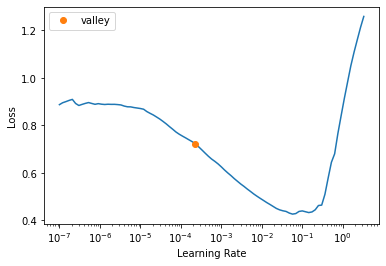

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.099773,0.152894,00:22
1,0.089114,0.202999,00:22
2,0.084433,0.074011,00:23
3,0.078545,0.063666,00:21
4,0.075127,0.064181,00:21


In [ ]:
test_df = df_nn.copy()
test_df.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
df_nn[:10]

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,...,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,...,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,...,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,...,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,...,False,False,False,1.248307e+09
5,1139255,10.184900,1001274,4605,...,False,False,False,1.229558e+09
6,1139256,9.952278,772701,1937,...,False,False,False,1.093478e+09
7,1139261,10.203592,902002,3539,...,False,False,False,1.132186e+09
8,1139272,9.975808,1036251,36003,...,False,False,False,1.251331e+09
9,1139275,11.082143,1016474,3883,...,False,False,False,1.186618e+09


In [ ]:
test_df[:10]

,SalesID,MachineID,ModelID,datasource,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,999089,3157,121,...,False,False,False,1.163635e+09
1,1139248,117657,77,121,...,False,False,False,1.080259e+09
2,1139249,434808,7009,121,...,False,False,False,1.077754e+09
3,1139251,1026470,332,121,...,False,False,False,1.305763e+09
4,1139253,1057373,17311,121,...,False,False,False,1.248307e+09
5,1139255,1001274,4605,121,...,False,False,False,1.229558e+09
6,1139256,772701,1937,121,...,False,False,False,1.093478e+09
7,1139261,902002,3539,121,...,False,False,False,1.132186e+09
8,1139272,1036251,36003,121,...,False,False,False,1.251331e+09
9,1139275,1016474,3883,121,...,False,False,False,1.186618e+09


In [ ]:
pd.options.display.max_columns = 64
test_df[test_df.SalesID==1139272]

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
8,1139272,1036251,36003,121,3.0,2008,302.0,Low,430HAG,430,HAG,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Manual,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2009,8,35,27,3,239,False,False,False,False,False,False,1.251331e+09


In [ ]:
SalesID1139272=test_df[test_df.SalesID==1139272]

In [ ]:
SalesID1139272

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
8,1139272,1036251,36003,121,3.0,2008,302.0,Low,430HAG,430,HAG,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Manual,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2009,8,35,27,3,239,False,False,False,False,False,False,1.251331e+09


In [ ]:
dl = learn.dls.test_dl(SalesID1139272)

In [ ]:
learn.get_preds(dl=dl)

(tensor([[10.0418]]), None)

In [ ]:
df_nn[df_nn.SalesID==1139272].SalePrice

8    9.975808
Name: SalePrice, dtype: float64

In [ ]:
SalePrice_emb = learn.model.embeds[3].weight #checking embeddings for Drive_System
SalePrice_emb

Parameter containing:
tensor([[-2.7771e-03,  2.0892e-03, -2.0662e-02,  5.3372e-02, -1.3302e-02, -1.5297e-02,  2.1967e-02, -2.9981e-02],
        [-3.6627e-02,  2.5940e-02, -3.6176e-02,  1.0579e-02, -3.5422e-02, -3.3954e-02, -1.2142e-03, -4.0179e-02],
        [ 2.5681e-02,  2.3264e-02,  9.1657e-03, -1.4978e-02,  1.2479e-02,  1.7794e-02, -2.2639e-05,  3.1134e-02],
        [ 1.4117e-02,  1.8946e-02,  9.8250e-03,  1.1775e-02,  1.5727e-02,  1.7149e-02, -2.1581e-02,  3.4299e-02],
        [ 3.2328e-02,  2.6384e-02,  2.1680e-02, -1.5840e-02,  6.3921e-03,  1.7465e-02, -3.7442e-02,  3.0170e-02],
        [-1.3161e-02,  4.7482e-02, -4.9831e-02, -2.2915e-03,  7.9079e-03,  8.4184e-03, -5.6371e-02,  3.8485e-03],
        [ 2.7493e-02, -5.1452e-03,  1.4737e-02, -1.9107e-02,  2.6982e-02,  1.3987e-02, -6.2528e-02,  3.9210e-02],
        [-2.8605e-03,  3.4851e-02,  2.7946e-03, -5.7143e-02, -2.1361e-02,  1.0347e-02, -1.6810e-02, -1.3935e-03],
        [ 5.4612e-02,  1.8918e-02,  1.5367e-02,  1.2606e-02,  3.09

In [ ]:
SalePrice_emb.T

tensor([[-2.7771e-03, -3.6627e-02,  2.5681e-02,  1.4117e-02,  3.2328e-02, -1.3161e-02,  2.7493e-02, -2.8605e-03,  5.4612e-02, -2.5571e-03,  4.0028e-02, -1.9235e-02,  3.6989e-02,  3.0678e-02,
          4.8354e-02,  5.3199e-02,  1.8869e-02,  1.9578e-02],
        [ 2.0892e-03,  2.5940e-02,  2.3264e-02,  1.8946e-02,  2.6384e-02,  4.7482e-02, -5.1452e-03,  3.4851e-02,  1.8918e-02,  5.2774e-02,  3.2435e-02,  5.1494e-03,  4.6579e-02,  1.0667e-02,
          2.7854e-02,  7.2609e-02,  4.0173e-03, -2.9287e-02],
        [-2.0662e-02, -3.6176e-02,  9.1657e-03,  9.8250e-03,  2.1680e-02, -4.9831e-02,  1.4737e-02,  2.7946e-03,  1.5367e-02, -9.0271e-03,  3.2975e-02, -3.2832e-03, -5.3938e-03,  4.2492e-02,
         -5.0946e-02,  4.0452e-03, -4.1670e-03,  3.0441e-02],
        [ 5.3372e-02,  1.0579e-02, -1.4978e-02,  1.1775e-02, -1.5840e-02, -2.2915e-03, -1.9107e-02, -5.7143e-02,  1.2606e-02, -1.0723e-02,  2.2550e-02, -2.8102e-02,  1.1724e-02,  2.2038e-02,
          3.1910e-02,  1.9129e-03,  1.9633e-02,  7

In [ ]:
SalePrice_emb[1]

tensor([-0.0366,  0.0259, -0.0362,  0.0106, -0.0354, -0.0340, -0.0012, -0.0402], grad_fn=<SelectBackward0>)

In [ ]:
df_nn_final['SalePrice'].unique()

array([11.09741002, 10.95080655,  9.21034037, 10.55841352,  9.30565055, 10.18490001,  9.95227772, 10.20359214,  9.97580821, 11.08214255, 10.08580911, 10.02127059, 10.49127422, 10.32548196,
       10.23995979,  9.85219426,  9.51044496,  9.15904708,  9.43348392,  9.35010231, 10.62132735, 10.4487146 , 10.16585182, 11.19821472, 10.40426284,  9.6485953 , 10.87804719, 10.73639668,
       11.39639165, 10.83958091,  9.54681261, 10.35774282,  9.82552601,  9.01796848,  9.92818017, 10.57131693, 10.96819829,  8.95544812, 10.37349118,  9.39266193, 11.22524339,  8.61250337,
       10.25765937, 10.47728798, 10.30895266,  9.04782144, 10.51867319, 10.04324949,  8.99961934, 10.27505111, 11.53272809, 10.46310334, 10.41930072,  9.61580548, 11.15625052,  8.9226583 ,
        9.47270464, 10.69194491, 11.1124479 ,  9.74096862, 10.858999  , 10.81977828, 10.1266311 , 10.14643373,  9.76995616, 11.06663836,  9.680344  , 10.93310697,  8.77955746,  9.87816974,
       10.6454249 , 11.32659589, 10.71441777, 10.292145

In [ ]:
import torch.nn.functional as F
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[3],dim=0)

tensor(-0.5831, grad_fn=<DivBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[2],dim=0)

tensor(-0.6660, grad_fn=<DivBackward0>)

In [ ]:
SalePrice_emb

Parameter containing:
tensor([[-2.7771e-03,  2.0892e-03, -2.0662e-02,  5.3372e-02, -1.3302e-02, -1.5297e-02,  2.1967e-02, -2.9981e-02],
        [-3.6627e-02,  2.5940e-02, -3.6176e-02,  1.0579e-02, -3.5422e-02, -3.3954e-02, -1.2142e-03, -4.0179e-02],
        [ 2.5681e-02,  2.3264e-02,  9.1657e-03, -1.4978e-02,  1.2479e-02,  1.7794e-02, -2.2639e-05,  3.1134e-02],
        [ 1.4117e-02,  1.8946e-02,  9.8250e-03,  1.1775e-02,  1.5727e-02,  1.7149e-02, -2.1581e-02,  3.4299e-02],
        [ 3.2328e-02,  2.6384e-02,  2.1680e-02, -1.5840e-02,  6.3921e-03,  1.7465e-02, -3.7442e-02,  3.0170e-02],
        [-1.3161e-02,  4.7482e-02, -4.9831e-02, -2.2915e-03,  7.9079e-03,  8.4184e-03, -5.6371e-02,  3.8485e-03],
        [ 2.7493e-02, -5.1452e-03,  1.4737e-02, -1.9107e-02,  2.6982e-02,  1.3987e-02, -6.2528e-02,  3.9210e-02],
        [-2.8605e-03,  3.4851e-02,  2.7946e-03, -5.7143e-02, -2.1361e-02,  1.0347e-02, -1.6810e-02, -1.3935e-03],
        [ 5.4612e-02,  1.8918e-02,  1.5367e-02,  1.2606e-02,  3.09

In [ ]:
SalePrice_emb[1]

tensor([-0.0366,  0.0259, -0.0362,  0.0106, -0.0354, -0.0340, -0.0012, -0.0402], grad_fn=<SelectBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[0],dim=0)

tensor(0.5908, grad_fn=<DivBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[1],dim=0)

tensor(1., grad_fn=<DivBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[2],dim=0)

tensor(-0.6660, grad_fn=<DivBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[3],dim=0)

tensor(-0.5831, grad_fn=<DivBackward0>)

In [ ]:
F.cosine_similarity(SalePrice_emb[1],SalePrice_emb[4],dim=0)

tensor(-0.5563, grad_fn=<DivBackward0>)

 'YearMade' - 2008, 'ProductSize' - Mini, 'ModelID' - 36003, and 'Tire_Size' - NaN, SalePrice - 9.975808 for SalesID = 1139272

**Actual saleprice - 9.975808, predicted saleprice - 9.975808. Prediction is exact!**